The town centre of city of Glasgow, is considered to be located at this postal code:
G2 3DU

In [44]:
import pandas as pd
import pgeocode

In [45]:
#df_ad = pd.read_csv(r"\\mnt\D:\OneDrive - University College London\T1\CASA0001\0. assessments\data\datashine_QS405SC0009_OA.csv")
D:\OneDrive - University College London\T1\CASA0001\0. assessments\Assignment 1\data
#df_glasgow = pd.read_csv(r"/mnt/d/OneDrive - University College London/T1/CASA0001/0. assessments/data/datashine_QS405SC0009_OA.csv", delimiter=',')

In [32]:
import pandas as pd
import pgeocode
df_Rent_glag = pd.read_excel(r"/mnt/d/OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/data/rightmove_glasgow.xlsx", sheet_name="East")

In [49]:
df_Rent_glag

,rent,Deposit,Beds,Bath,Postcode,Type,Location,Ref
0,1450,1650,2,1,G1 2BG,F,Hanover Court,NaN
1,2300,4600,3,2,G1 2AF,F,George Square,NaN
2,1400,500,3,2,G4 0HW,F,"McPhater Street, Matrix Building, City Centre",NaN
3,995,995,1,1,G2 3HQ,F,"Sauchiehall Street, Glasgow, G2",NaN
4,2500,2500,6,4,G3 7DN,H,"Granville Street, Charing Cross, Glasgow",LET00786
...,...,...,...,...,...,...,...,...
207,1500,2250,3,1,G66 8AB,H,"Antermony Road, Milton Of Campsie",NaN
208,850,950,3,1,G52 2JU,H,"Chirnside Road, Glasgow, Hillington, G52",LARN2112001
209,1400,1500,3,2,G33 1RD,H,Briarcroft Drive,LARN2103005
210,1650,1650,3,1,G44 3UZ,H,Clarkston Road,LARN1904023


Now, output it to .csv for R to readin and visualize:

In [2]:
df_Rent_glag.to_csv(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/data/dataglasgow_rent_dist2.csv", encoding='utf-8', index=False)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pgeocode
import seaborn as sns
df_Rent_glag = pd.read_excel(r"/mnt/d/OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/data/rightmove_glasgow.xlsx", sheet_name="East")
dist = pgeocode.GeoDistance('GB')
df_Rent_glag['distance_to_town_centre'] = df_Rent_glag.apply(lambda row: dist.query_postal_code(row.Postcode,'G2 3DU'), axis = 1)
df_House = df_Rent_glag.loc[df_Rent_glag['Type'] == "H"]
df_Flat = df_Rent_glag.loc[df_Rent_glag['Type'] == "F"]
df_Parking = df_Rent_glag.loc[df_Rent_glag['Type'] == "P"]
df_Flat_1_beds = df_Flat.loc[df_Flat['Beds'] == 1]
df_Flat_2_beds = df_Flat.loc[df_Flat['Beds'] == 2]
df_Flat_3_beds = df_Flat.loc[df_Flat['Beds'] == 3]
df_Flat_4_beds = df_Flat.loc[df_Flat['Beds'] == 4]
df_House_2Beds = df_House.loc[df_House['Beds'] == 2]
df_House_3Beds = df_House.loc[df_House['Beds'] == 3]
df_House_4Beds = df_House.loc[df_House['Beds'] == 4]
df_House_5Beds = df_House.loc[df_House['Beds'] == 5]
df_House_6_plus_Beds = df_House.loc[(df_House['Beds'] == 6) | (df_House['Beds'] == 7) | (df_House['Beds'] == 8)]

All scatter:

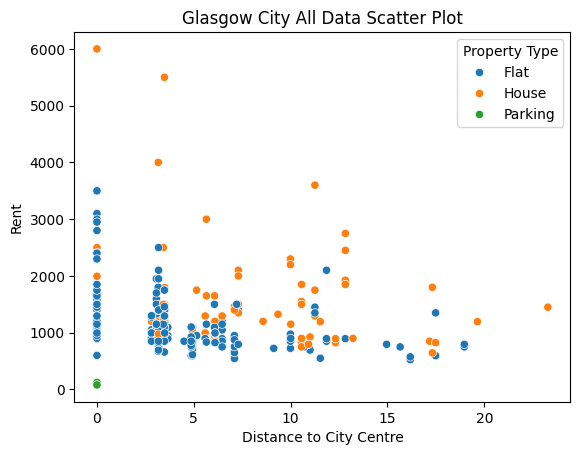

In [2]:
all_scatter = sns.scatterplot(data=df_Rent_glag, x='distance_to_town_centre', y='rent', hue='Type')
#heading_all,legend_all = all_scatter.get_legend_handles_labels()
#labels=['Flat','House','Parking']
#all_scatter.legend(heading_all, legend_all, title='Property Type', loc='upper right') 
#new_title = 'Property Type'
#all_scatter._legend.set_title(new_title)
# replace labels
#new_labels = ['Flat','House','Parking']
#for t, l in zip(all_scatter._legend.texts, new_labels):
 #   t.set_text(l)
# Access the legend
legend = plt.legend()

# Modify the legend labels
legend.set_title('Property Type')
legend.texts[0].set_text('Flat')
legend.texts[1].set_text('House')
legend.texts[2].set_text('Parking')

plt.title("Glasgow City All Data Scatter Plot")
#plt.legend(title= 'Property Type', loc='upper right', labels=['Flat','House','Parking'])
#plt.legend()
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/all_scatter.png", bbox_inches = 'tight')
plt.show()

House datapoints scatter:

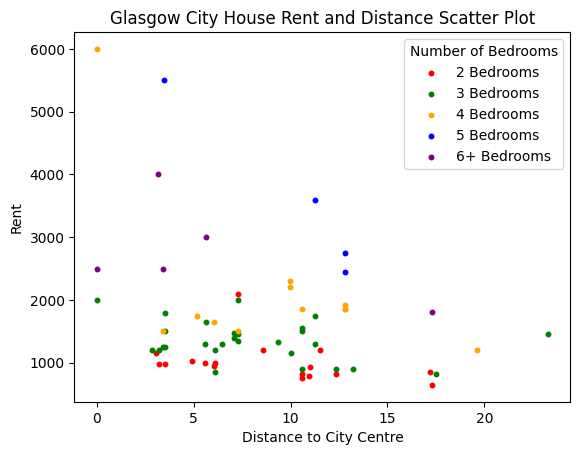

In [13]:
plt.scatter(df_House_2Beds['distance_to_town_centre'], df_House_2Beds['rent'],
            c = "red",
            linewidths = 2, 
            edgecolor ="red",
            s = 5)

plt.scatter(df_House_3Beds['distance_to_town_centre'], df_House_3Beds['rent'],
            c= "green",
            linewidths = 2,
            edgecolor ="green", 
            s = 5)

plt.scatter(df_House_4Beds['distance_to_town_centre'], df_House_4Beds['rent'],
            c= "orange",
            linewidths = 2,
            edgecolor ="orange", 
            s = 5)

plt.scatter(df_House_5Beds['distance_to_town_centre'], df_House_5Beds['rent'],
            c= "blue",
            linewidths = 2,
            edgecolor ="blue", 
            s = 5)

plt.scatter(df_House_6_plus_Beds['distance_to_town_centre'], df_House_6_plus_Beds['rent'],
            c= "purple",
            linewidths = 2,
            edgecolor ="purple", 
            s = 5)
#plt.scatter(df_Parking['distance_to_town_centre'], df_Parking['rent'],
  #          linewidths = 2,
  #          edgecolor ="yellow", 
   #         s = 200)
plt.title("Glasgow City House Rent and Distance Scatter Plot")
plt.legend(title= 'Number of Bedrooms', loc='upper right', labels=['2 Bedrooms', '3 Bedrooms','4 Bedrooms','5 Bedrooms','6+ Bedrooms'])
#plt.legend()
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/all_Houses_scatter.png", bbox_inches = 'tight')
plt.show()

Flats scatter:

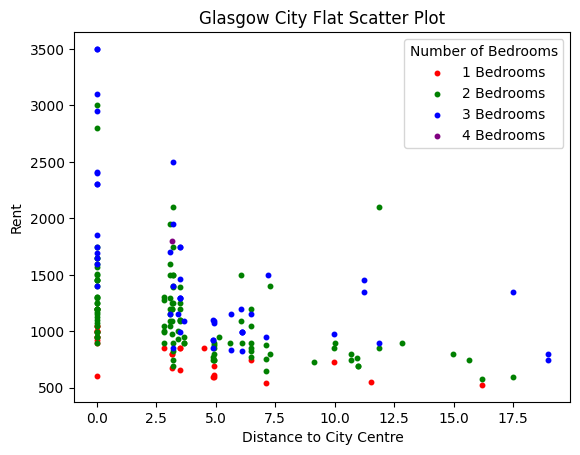

In [14]:
plt.scatter(df_Flat_1_beds['distance_to_town_centre'], df_Flat_1_beds['rent'],
            c = "red",
            linewidths = 2, 
            edgecolor ="red",
            s = 5)

plt.scatter(df_Flat_2_beds['distance_to_town_centre'], df_Flat_2_beds['rent'],
            c= "green",
            linewidths = 2,
            edgecolor ="green", 
            s = 5)

plt.scatter(df_Flat_3_beds['distance_to_town_centre'], df_Flat_3_beds['rent'],
            c= "blue",
            linewidths = 2,
            edgecolor ="blue", 
            s = 5)

plt.scatter(df_Flat_4_beds['distance_to_town_centre'], df_Flat_4_beds['rent'],
            c= "purple",
            linewidths = 2,
            edgecolor ="purple", 
            s = 5)

#plt.scatter(df_Parking['distance_to_town_centre'], df_Parking['rent'],
  #          linewidths = 2,
  #          edgecolor ="yellow", 
   #         s = 200)
plt.title("Glasgow City Flat Scatter Plot")
#plt.legend(title=' Flat \n and \n House', loc='upper right')
#plt.legend()
plt.legend(title= 'Number of Bedrooms', loc='upper right', labels=['1 Bedrooms', '2 Bedrooms','3 Bedrooms','4 Bedrooms'])
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/all_flats_scatter.png", bbox_inches = 'tight')
plt.show()

LMplots:

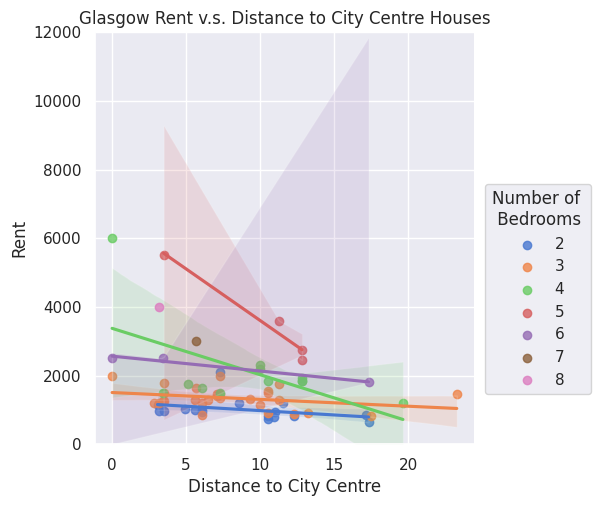

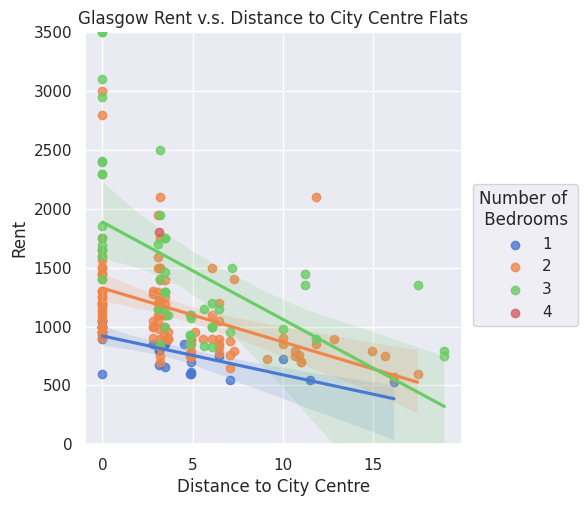

In [24]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
sns.lmplot(data=df_House, x="distance_to_town_centre", y="rent", hue="Beds", legend=False)
#house_3_beds = sns.lmplot(data=df_House_3Beds, x="distance_to_town_centre", y="rent")
#house_2_beds = sns.lmplot(data=df_House_2Beds, x="distance_to_town_centre", y="rent")
#plt.legend(title='Glasgow City House Rent v.s. Distance', loc='right', labels=['Distance to City Centre', 'Rent'])
plt.ylim(0, 12000)
plt.title("Glasgow Rent v.s. Distance to City Centre Houses")
plt.legend(title='Number of \n Bedrooms', bbox_to_anchor = (1.01, 0.65), ncol = 1)
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/Houses.png", bbox_inches = 'tight')
#plt.scatter(df_Parking['distance_to_town_centre'], df_Parking['rent'],
  #          linewidths = 2,
  #          edgecolor ="yellow", 
   #         s = 200)
g = sns.lmplot(data=df_Flat, x="distance_to_town_centre", y="rent", hue="Beds", legend=False, ci=97.9)
#fig, ax = plt.subplots()
plt.ylim(0, 3500)
#plt.legend(title='Glasgow City Flat Rent v.s. Distance', loc='right', labels=['Distance to City Centre', 'Rent'])
plt.title("Glasgow Rent v.s. Distance to City Centre Flats")
plt.legend(title='Number of \n Bedrooms', bbox_to_anchor = (1.01, 0.65), ncol = 1)
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/Flats.png", bbox_inches = 'tight')
#plt.show()



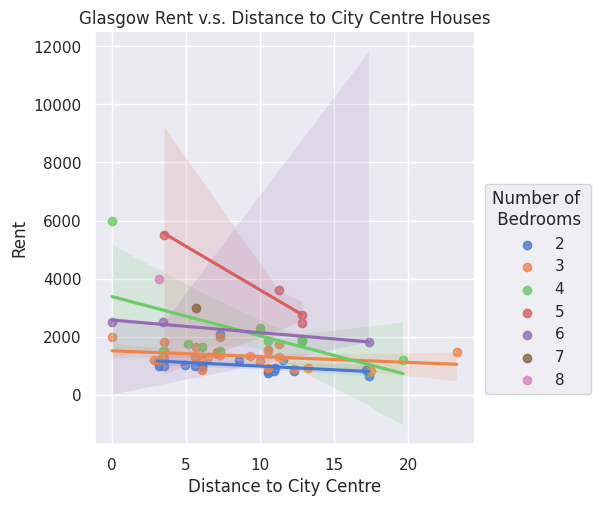

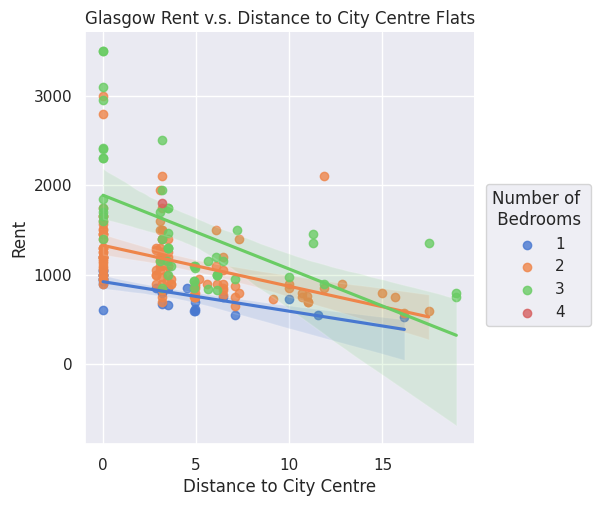

In [25]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
sns.lmplot(data=df_House, x="distance_to_town_centre", y="rent", hue="Beds", legend=False, ci=97)
#house_3_beds = sns.lmplot(data=df_House_3Beds, x="distance_to_town_centre", y="rent")
#house_2_beds = sns.lmplot(data=df_House_2Beds, x="distance_to_town_centre", y="rent")
#plt.legend(title='Glasgow City House Rent v.s. Distance', loc='right', labels=['Distance to City Centre', 'Rent'])
plt.title("Glasgow Rent v.s. Distance to City Centre Houses")
plt.legend(title='Number of \n Bedrooms', bbox_to_anchor = (1.01, 0.65), ncol = 1)
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/Houses_lowess.png", bbox_inches = 'tight')
#plt.scatter(df_Parking['distance_to_town_centre'], df_Parking['rent'],
  #          linewidths = 2,
  #          edgecolor ="yellow", 
   #         s = 200)
g = sns.lmplot(data=df_Flat, x="distance_to_town_centre", y="rent", hue="Beds", legend=False, ci=96)
#plt.legend(title='Glasgow City Flat Rent v.s. Distance', loc='right', labels=['Distance to City Centre', 'Rent'])
plt.title("Glasgow Rent v.s. Distance to City Centre Flats")
plt.legend(title='Number of \n Bedrooms', bbox_to_anchor = (1.01, 0.65), ncol = 1)
plt.xlabel("Distance to City Centre")
plt.ylabel("Rent")
plt.savefig(r"/mnt/d//OneDrive - University College London/T1/CASA0001/0. assessments/Assignment 1/Flats_lowess.png", bbox_inches = 'tight')
#plt.show()



In [51]:
dist.query_postal_code("G1",'G1 3DU')

0.0

Get ready to calculate GB distance by postcode.

__Town Centre__ set to be G2 3DU

In [52]:
df_Rent_glag['distance_to_town_centre'] = df_Rent_glag.apply(lambda row: dist.query_postal_code(row.Postcode,'G2 3DU'), axis = 1)

In [53]:
df_House = df_Rent_glag.loc[df_Rent_glag['Type'] == "H"]
df_Flat = df_Rent_glag.loc[df_Rent_glag['Type'] == "F"]
df_Parking = df_Rent_glag.loc[df_Rent_glag['Type'] == "P"]

In [54]:
df_Parking.shape

(3, 9)

We have 57 datapoints in House for rent, 142 in flat for rent, 3 in parking spaces

In [50]:
df_Flat_1_beds = df_Flat.loc[df_Flat['Beds'] == 1]
df_Flat_2_beds = df_Flat.loc[df_Flat['Beds'] == 2]
df_Flat_3_beds = df_Flat.loc[df_Flat['Beds'] == 3]
df_Flat_4_beds = df_Flat.loc[df_Flat['Beds'] == 4]
df_House_2Beds = df_House.loc[df_House['Beds'] == 2]
df_House_3Beds = df_House.loc[df_House['Beds'] == 3]
df_House_4Beds = df_House.loc[df_House['Beds'] == 4]
df_House_5Beds = df_House.loc[df_House['Beds'] == 5]
#df_House_6_plus_Beds = df_House.loc[df_House['Beds' == 6 | df_House['Beds' == 7 | df_House['Beds'] == 8]

In [63]:
df_House_6_plus_Beds = df_House.loc[(df_House['Beds'] == 6) | (df_House['Beds'] == 7) | (df_House['Beds'] == 8)]

In [57]:
df_House.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [58]:
df_Rent_glag

,rent,Deposit,Beds,Bath,Postcode,Type,Location,Ref,distance_to_town_centre
0,1450,1650,2,1,G1 2BG,F,Hanover Court,NaN,0.000000
1,2300,4600,3,2,G1 2AF,F,George Square,NaN,0.000000
2,1400,500,3,2,G4 0HW,F,"McPhater Street, Matrix Building, City Centre",NaN,0.000000
3,995,995,1,1,G2 3HQ,F,"Sauchiehall Street, Glasgow, G2",NaN,0.000000
4,2500,2500,6,4,G3 7DN,H,"Granville Street, Charing Cross, Glasgow",LET00786,0.000000
...,...,...,...,...,...,...,...,...,...
253,1295,1295,3,1,G41 3TL,F,Frankfort Street,LARN1901028,3.482528
254,995,1990,3,1,G52 2EG,F,"Burnfoot Drive, Glasgow",LARN1809026,6.093357
255,995,1990,3,1,G52 3AW,F,"Muirdrum Avenue, Glasgow, G52",LARN1809026,6.093357
256,1400,2100,3,1,G12 8TN,F,"Flat B/L, 12 Highburgh Road",LARN1906017,3.181787


Lets plot for 2, 3, 4, 5, and 6+ bedrooms for house rentals

In [6]:
import seaborn as sns

Create a function to process the number of bedrooms and assign a categorical value:

In [28]:
def bedroomsType(row):
    if row['Beds'] == 2:
        val = '2_Bedroom'
    elif row['Beds'] == 1:
        val = '1_Bedrooms'
    elif row['Beds'] == 3:
        val = '3_Bedrooms'
    elif row['Beds'] == 4:
        val = '4_Bedrooms'
    elif row['Beds'] == 5:
        val = '5_Bedrooms'
    else:
        val = '6_and_More_Bedrooms'
    return val

Now apply this function to our flat and house datasets

In [31]:
df_House['BRType'] = df_House.apply(bedroomsType, axis=1)
df_Flat['BRType'] = df_Flat.apply(bedroomsType, axis=1)

/tmp/ipykernel_1053/3476294838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_House['BRType'] = df_House.apply(bedroomsType, axis=1)
/tmp/ipykernel_1053/3476294838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Flat['BRType'] = df_Flat.apply(bedroomsType, axis=1)


Now plot a scatter plot to see the distribution of rent and distance, by beds and house or flat.

In [ ]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
plt.scatter(x1, y1, c ="pink", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
 
plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            marker ="^", 
            edgecolor ="red", 
            s = 200)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

ValueError: 0.845144357900255 is not a valid value for color

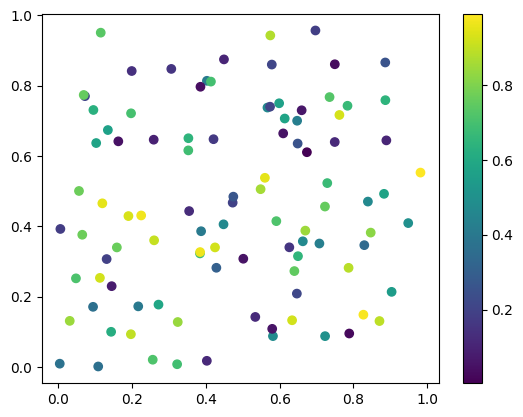

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Add a color bar
plt.colorbar()

# Add labels to the data points
for i, color in enumerate(colors):
    plt.text(x[i], y[i], f'Data type {i}', color=color)

# Add a legend
plt.legend(['Data'])

# Show the plot
plt.show()


In [3]:
df_glasgow.head()

,Unnamed: 0,Example Postcode,Council Name,Council Code,QS405SC0009,QS405SC0001 (base),OA Percentage
0,S00117008,G21 2PU,Glasgow City,S12000046,2,52,3.846154
1,S00113248,G20 8JH,Glasgow City,S12000046,1,56,1.785714
2,S00116481,G31 2QR,Glasgow City,S12000046,17,43,39.534884
3,S00112277,G3 8GP,Glasgow City,S12000046,3,29,10.344828
4,S00117465,G52 2EA,Glasgow City,S12000046,0,62,0.000000


In [4]:
df_glasgow.rename(columns = {'Unnamed: 0':'Census_Output_Area', 'Example Postcode': 'postcode'}, inplace = True)

Select the distance calculating to UK.

In [7]:
#df_glasgow['age_bmi'] = dist.query_postal_code(df_glasgow['Example Postcode'],'G2 3DU')

df_glasgow['distance_to_town_centre'] = df_glasgow.apply(lambda row: dist.query_postal_code(row.postcode,'G2 3DU'), axis = 1)

In [16]:
df_glasgow['postcode']

0       G21 2PU
1       G20 8JH
2       G31 2QR
3        G3 8GP
4       G52 2EA
         ...   
4636    G73 1PW
4637    G73 3BU
4638    G73 2RG
4639    G73 2DJ
4640    G73 2DN
Name: postcode, Length: 4641, dtype: object

Alonso's model and its realtion with urban centrality:

1. What is centrality?
   - Geometric centre - the centroid. The simplest and the very first notion
   - Centre of mass
   - Urban centres: a variety of spatial processes. Multi-dimensional process - complex
     
2. Urban centres: 
   - Gradient:
   - Hierarchy
   - Multiple aspects: Population density, Housing characteristics, Built-up patterns, Commuting patterns, Residential migrations
     
3. Morphological and functional centralities
   - Morphological attributes
5. asdasd
6. asda


In [22]:
'G21 2PU',
'G20 8JH',
'G31 2QR',
'G3 8GP',
'G52 2EA',
'G73 1PW',
'G73 3BU',
'G73 2RG',
'G73 2DJ',
'G73 2DN'

'G73 2DN'

In [25]:
print('hello')

hello


In [27]:
import requests
from bs4 import BeautifulSoup

# Define the base URL for Home.co.uk's rent data page
BASE_URL = "https://www.home.co.uk/for_rent/current_rents_by_town.htm?county=glasgow"

# Define a function to get the rent data for a given postcode
def get_rent_data(postcode):
  """Gets the rent data for a given postcode.

  Args:
    postcode: The postcode to search for.

  Returns:
    A dictionary containing the rent data for the given postcode, or None if the data could not be found.
  """

  # Create a request object
  response = requests.get(BASE_URL + "&postcode=" + postcode)

  # Check if the request was successful
  if response.status_code != 200:
    return None

  # Parse the HTML response using BeautifulSoup
  soup = BeautifulSoup(response.content, "html.parser")

  # Try to find the table containing the rent data
  rent_data_table = soup.find("table", class_="table table-striped table-hover")

  # If the table is not found, return None
  if rent_data_table is None:
    return None

  # Extract the rent data from the table
  rent_data_dict = {}
  rent_data_rows = rent_data_table.find_all("tr")
  for rent_data_row in rent_data_rows:
    rent_data_columns = rent_data_row.find_all("td")
    if len(rent_data_columns) == 3:
      rent_data_dict[rent_data_columns[0].text] = rent_data_columns[2].text

  return rent_data_dict

# Get the rent data for the given postcodes
postcodes = ["G21 2PU", "G20 8JH", "G31 2QR", "G3 8GP", "G52 2EA", "G73 1PW", "G73 3BU", "G73 2RG", "G73 2DJ", "G73 2DN"]
rent_data = []
for postcode in postcodes:
  rent_data_dict = get_rent_data(postcode)
  if rent_data_dict is not None:
    print('test')
    rent_data.append(rent_data_dict)

# Save the rent data to a file
with open("rent_data.csv", "w") as f:
  f.write("town,rent\n")
  for rent_data_dict in rent_data:
    f.write("{},{}\n".format(rent_data_dict["Town"], rent_data_dict["Average Current Rent"]))

In [28]:
# Get the rent data for the given postcodes
postcodes = ["G21 2PU", "G20 8JH", "G31 2QR", "G3 8GP", "G52 2EA", "G73 1PW", "G73 3BU", "G73 2RG", "G73 2DJ", "G73 2DN"]
rent_data = []
for postcode in postcodes:
  rent_data_dict = get_rent_data(postcode)
  if rent_data_dict is not None:
    print('test')
    rent_data.append(rent_data_dict)

# Save the rent data to a file
with open("rent_data.csv", "w") as f:
  f.write("town,rent\n")
  for rent_data_dict in rent_data:
    f.write("{},{}\n".format(rent_data_dict["Town"], rent_data_dict["Average Current Rent"]))

In [30]:
import requests
from bs4 import BeautifulSoup

# Define the base URL for Home.co.uk's rent data page
BASE_URL = "https://www.home.co.uk/for_rent/current_rents_by_town.htm?county=glasgow"

# Define a function to get the rent data for a given postcode
def get_rent_data(postcode):
  """Gets the rent data for a given postcode.

  Args:
    postcode: The postcode to search for.

  Returns:
    A dictionary containing the rent data for the given postcode, or None if the data could not be found.
  """

  # Create a request object
  response = requests.get(BASE_URL + "&postcode=" + postcode)

  # Check if the request was successful
  if response.status_code != 200:
    return None

  # Parse the HTML response using BeautifulSoup
  soup = BeautifulSoup(response.content, "html.parser")

  # Try to find the heading containing the rent data
  rent_data_heading = soup.find("h2", text="Average* property rents in G21:")

  # If the heading is not found, return None
  if rent_data_heading is None:
    return None

  # Extract the rent data from the heading
  rent_data_dict = {}
  rent_data_dict["Town"] = "G21"

  try:
    rent_data_dict["Average Current Rent"] = rent_data_heading.find_next("span").text
  except AttributeError:
    rent_data_dict["Average Current Rent"] = None

  return rent_data_dict

# Get the rent data for the given postcode
postcode = "G21"
rent_data_dict = get_rent_data(postcode)

# Save the rent data to a file
with open("rent_data.csv", "w") as f:
  f.write("town,rent\n")
  if rent_data_dict is not None:
    f.write("{},{}\n".format(rent_data_dict["Town"], rent_data_dict["Average Current Rent"]))

/tmp/ipykernel_561/258819616.py:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  rent_data_heading = soup.find("h2", text="Average* property rents in G21:")


In [ ]:
https://www.home.co.uk/guides/local_info.htm?location=g20

In [40]:
import requests
from bs4 import BeautifulSoup

#BASE_URL = "https://www.home.co.uk/guides/local_info.htm?location="

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
#response = requests.get(url, headers=headers)
def get_rent_data(postcode):
    #url = BASE_URL +  postcode
    BASE_URL1 = "https://www.home.co.uk/for_rent/"
    BASE_URL2 = "/current_rents?location="
    postcode = postcode.lower()
    url = BASE_URL1 +  postcode.split(' ')[0] + BASE_URL2 + postcode.split(' ')[0]
    print(url)
    #response = requests.get(url)
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        return None
       

    soup = BeautifulSoup(response.content, "html.parser")
    rent_data_heading = soup.find("h2", text="Average rent".format(postcode))
    print(rent_data_heading)
    if rent_data_heading is None:
        return None

    rent_data_dict = {}
    rent_data_dict["Town"] = postcode
    rent_data_dict["Average Current Rent"] = rent_data_heading.find_next("span").text

    return rent_data_dict




postcodes = ['G21 2PU', 'G20 8JH', 'G31 2QR', 'G3 8GP', 'G52 2EA', 'G73 1PW', 'G73 3BU', 'G73 2RG', 'G73 2DJ', 'G73 2DN']

with open("rent_data.csv", "w") as f:
    f.write("town,rent\n")
    for postcode in postcodes:
        rent_data_dict = get_rent_data(postcode)
        if rent_data_dict is not None:
            f.write("{},{}\n".format(rent_data_dict["Town"], rent_data_dict["Average Current Rent"]))


https://www.home.co.uk/for_rent/g21/current_rents?location=g21


/tmp/ipykernel_561/1124341719.py:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  rent_data_heading = soup.find("h2", text="Average rent".format(postcode))


None
https://www.home.co.uk/for_rent/g20/current_rents?location=g20
None
https://www.home.co.uk/for_rent/g31/current_rents?location=g31
None
https://www.home.co.uk/for_rent/g3/current_rents?location=g3
None
https://www.home.co.uk/for_rent/g52/current_rents?location=g52
None
https://www.home.co.uk/for_rent/g73/current_rents?location=g73
None
https://www.home.co.uk/for_rent/g73/current_rents?location=g73
None
https://www.home.co.uk/for_rent/g73/current_rents?location=g73
None
https://www.home.co.uk/for_rent/g73/current_rents?location=g73
None
https://www.home.co.uk/for_rent/g73/current_rents?location=g73
None


In [38]:

stest = "G20 8JH"
stest.split(' ')[0]

'G20'

In [18]:
import pgeocode

dist.query_postal_code('WC2N', 'EH53')

535.4837300340208